# Week 3
## Case Study 2: Language Processing
## Video 3.2.1: Introduction to Language Processing

Patterns within written text are not the same across all authors or languages. In this case study, we will examine the properties of individual books
in a book collection from various authors and various languages. More specifically, we will look at book lengths, number of unique words, and how these attributes cluster by language of or authorship.  
We have downloaded a collection of over 100 titles
from Project Gutenberg for analysis as a sample library for this case study.
The downloaded sample consist of several nested folders.
At the top level, we have four languages: English, French, German,
and Portuguese.  
Our goal is to write a function that given
a string of text counts the number of times each unique word appears.
What's the best way to keep track of these words? Because we'd like to associate each word with a counter,
Python dictionaries are a very natural choice.
Here, the keys are strings, the words containing the input text,
and the values are numbers that counts indicating how many times
each word appears in the text.

## Video 3.2.2: Counting Words

In [1]:
# Before we start coding the function itself it's helpful to create a test string.
test = "This is my test text. We're keeping this short text to keep things manageable"

In [2]:
def countWords(text):
    """
    Count the number of times each word occures in the input text (str).
    Outputs dict with keys - words, values - number of times thay appear
    """
    wordsCounts = {}
    for word in text.split(" "):
        if word in wordsCounts:
            wordsCounts[word] +=1
        else:
            wordsCounts[word] = 1
    return(wordsCounts)
            
        
    

In [3]:
countWords(test)

{'This': 1,
 "We're": 1,
 'is': 1,
 'keep': 1,
 'keeping': 1,
 'manageable': 1,
 'my': 1,
 'short': 1,
 'test': 1,
 'text': 1,
 'text.': 1,
 'things': 1,
 'this': 1,
 'to': 1}

to avoid repitional it is necesery to delet all the panctuataions and make text consistant - lower case. .......

In [6]:
def countWords(text):
    """
    Count the number of times each word occures in the input text (str).
    Outputs dict with keys - words, values - number of times thay appear
    """
    
    text = text.lower()
    skip = [".",",",";","'",'"']
    for char in skip:
        text = text.replace(char, "")
    
    wordsCounts = {}
    for word in text.split(" "):
        if word in wordsCounts:
            wordsCounts[word] +=1
        else:
            wordsCounts[word] = 1
            
    return(wordsCounts)


In [7]:
countWords(test)

{'is': 1,
 'keep': 1,
 'keeping': 1,
 'manageable': 1,
 'my': 1,
 'short': 1,
 'test': 1,
 'text': 2,
 'things': 1,
 'this': 2,
 'to': 1,
 'were': 1}

It's useful to be able to write your own counting routine like we just did.
However, counting the frequency of objects
is such a common operation that Python provides
what is known as a counter tool to support rabbit tallies.
We first need to import it from the collections module, which
provides many additional high performance data types.
The object returned by counter behaves much like a dictionary,
although strictly speaking it's a subclass of the Python dictionary
object.

In [18]:
from collections import Counter


def countWordsFast(text):
    """
    Count the number of times each word occures in the input text (str).
    Outputs dict with keys - words, values - number of times thay appear
    """
    
    text = text.lower()
    skip = [".",",",";","'",'"']
    for char in skip:
        text = text.replace(char, "")
    
    wordsCounts = Counter(text.split(" "))
            
    return(wordsCounts)

In [19]:
# Before we start coding the function itself it's helpful to create a test string.
text = "This is my test text. We're keeping this short text to keep things manageable"

countWordsFast(text)

Counter({'is': 1,
         'keep': 1,
         'keeping': 1,
         'manageable': 1,
         'my': 1,
         'short': 1,
         'test': 1,
         'text': 2,
         'things': 1,
         'this': 2,
         'to': 1,
         'were': 1})

We want to ask Python if that's equal to the object which is returned by count_words_fast on that same input.
In this case, the answer is true, therefore
we know that these two different implementations of the same function
return identical objects.


In [21]:
countWordsFast(text) == countWords(text)

True

In [23]:
len(countWords("This comprehension check is to check for comprehension."))

6

In [25]:
countWords(text) is countWordsFast(text)

False

## Video 3.2.3: Reading in a Book

We're familiar by now with reading files.
But here we'll include an additional argument.
Character encoding refers to the process how
computer encodes certain characters.
In this case, we'll use what is called UTF-8 encoding, which
is the dominant character encoding for the web.
We will also replace backslash n and backslash r characters.

In [40]:
import os

# Before we start coding the function itself it's helpful to create a test string.
text = "This is my test text. We're keeping this short text to keep things manageable"


def readBook(titlePath):
    """
    Read a book return it as a string.
    """
    
    with open(titlePath, "r", encoding="utf8") as currentFile:
        text = currentFile.read() # importanat to add .read() to be able to call .replace() on the object
        text = text.replace("\n", "").replace("\r", "")
    return(text)

In [41]:
titlePath = os.path.join( "Books", "English", "shakespeare", "Romeo and Juliet.txt" )
text = readBook(titlePath)
print(len(text)) # print number of words in the Book.

169275


Find the specyfic fragment in the book:

In [43]:
index = text.find("What's in a name?") # find the sample text and return its char index
print(index)

42757


Print fragment of the book using found index:

In [46]:
sampleText = text[index: index + 200] # 200 chars form the index 
print(sampleText)

What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. 


## Video 3.2.4: Computing Word Frequency Statistics

Given a dictionary or a counter object from the collections module,
we would like to know how many unique words there are in a given book.
We'd also like to return the frequencies of each word, meaning,
count-specifying how many times each word has appeared.
To do this we'll be writing a word stats function.

In [43]:
import os
from collections import Counter

def readBook(titlePath):
    """
    Read a book return it as a string.
    """
    
    with open(titlePath, "r", encoding="utf8") as currentFile:
        text = currentFile.read() # importanat to add .read() to be able to call .replace() on the object
        text = text.replace("\n", "").replace("\r", "")
    return(text)

def countWordsFast(text):
    """
    Count the number of times each word occures in the input text (str).
    Outputs dict with keys - words, values - number of times thay appear
    """
    
    text = text.lower()
    skip = [".",",",";","'",'"']
    for char in skip:
        text = text.replace(char, "")
    
    wordsCounts = Counter(text.split(" "))
    return(wordsCounts)

def wordStats(wordCounts):
    """Return number of unique words and words frequancy."""
    numUnique = len(wordCounts) # Number if unique words in the dicronary 
    counts = wordCounts.values() # number of times particular words appear in the text
    return(numUnique, counts)
    

In [6]:
titlePath = os.path.join( "Books", "English", "shakespeare", "Romeo and Juliet.txt" )
text = readBook(titlePath)
wordCount = countWordsFast(text)
(numUnique, counts) = wordStats(wordCount)

#print(wordCount)
print(numUnique)
#print(counts)
print(sum(counts)) # number of all words in text.

5135
40776


## Video 3.2.5: Reading Multiple Files

In [7]:
import os

bookDir = "./Books"
folder = os.listdir(bookDir) # prints out the list of subdirectories in the bookDir
print(folder)

to create correct path string we can use os.path.join() method that takes folder/ file names and creats corect path string based on your operating system.

In [11]:
path = os.path.join( "Books", "English", "shakespeare", "Romeo and Juliet.txt" )
print(path)

Books\English\shakespeare\Romeo and Juliet.txt


Now we can use it to iterate over all the folders and files creating all the possible book paths.


In [10]:
for language in os.listdir(bookDir):
    for author in os.listdir(os.path.join( bookDir, language)):
        for title in os.listdir(os.path.join( bookDir, language, author)):
            inputfile = os.path.join( bookDir, language, author, title)
            #print(inputfile)
            

In [12]:
for language in os.listdir(bookDir):
    for author in os.listdir(os.path.join( bookDir, language)):
        for title in os.listdir(os.path.join( bookDir, language, author)):
            inputfile = os.path.join( bookDir, language, author, title)
            #print(inputfile)
            text = readBook(inputfile)
            (numUnique, counts) = wordStats(countWordsFast(text))

### Pandeas intro 
Creating table using pandas

In [14]:
import pandas as pd

table = pd.DataFrame(columns = ("name", "age"))
table.loc[1] = "James", 22 # creating first (1) raw
table.loc[2] = "Jess", 34 # ....

table

,name,age
1,James,22
2,Jess,34


In [15]:
table.columns

In [15]:
Using pandas for Books Case Study. 

Index(['name', 'age'], dtype='object')

In [16]:
stats = pd.DataFrame(columns = ("language","author", "title","length", "unique"))
titleNum = 1


for language in os.listdir(bookDir):
    for author in os.listdir(os.path.join( bookDir, language)):
        for title in os.listdir(os.path.join( bookDir, language, author)):
            inputfile = os.path.join( bookDir, language, author, title)
            #print(inputfile)
            text = readBook(inputfile)
            (numUnique, counts) = wordStats(countWordsFast(text))
            stats.loc[titleNum] = language, author, title, sum(counts), numUnique 
            titleNum += 1

In [26]:
# stats # Will pring whole table. 

head = stats.head() # will print first 5 rows
head

,language,author,title,length,unique
1,English,shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,shakespeare,Hamlet.txt,28551,6776
3,English,shakespeare,Macbeth.txt,16874,4780
4,English,shakespeare,Othello.txt,26590,5898
5,English,shakespeare,Richard III.txt,48315,5488


In [25]:
tail = stats.tail() # will print last 5 rows
tail

,language,author,title,length,unique
98,Portuguese,Queir¢s,O crime do padre Amaro.txt,128630,29716
99,Portuguese,Queir¢s,O Mandarim.txt,21440,7941
100,Portuguese,Queir¢s,O Primo Bazilio.txt,107303,28059
101,Portuguese,Queir¢s,Os Maias.txt,195771,41217
102,Portuguese,shakespeare,Hamlet.txt,30567,9733


To modyfy the thable you can simply use additional methds while creating it.

In [28]:
for language in os.listdir(bookDir):
    for author in os.listdir(os.path.join( bookDir, language)):
        for title in os.listdir(os.path.join( bookDir, language, author)):
            inputfile = os.path.join( bookDir, language, author, title)
            #print(inputfile)
            text = readBook(inputfile)
            (numUnique, counts) = wordStats(countWordsFast(text))
            stats.loc[titleNum] = language, author.capitalize(), title.replace(".txt", ""), sum(counts), numUnique 
            titleNum += 1

In [29]:
tail = stats.tail() # will print last 5 rows
tail

,language,author,title,length,unique
200,Portuguese,Queir¢s,O crime do padre Amaro,128630,29716
201,Portuguese,Queir¢s,O Mandarim,21440,7941
202,Portuguese,Queir¢s,O Primo Bazilio,107303,28059
203,Portuguese,Queir¢s,Os Maias,195771,41217
204,Portuguese,Shakespeare,Hamlet,30567,9733


## Video 3.2.6: Plotting Book Statistics

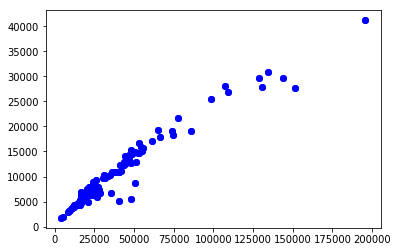

In [34]:
import matplotlib.pyplot as plt 


plt.plot(stats.length, stats.unique, "bo");
plt.show();

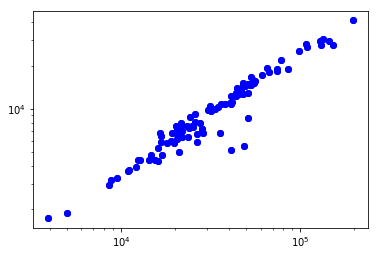

In [36]:
#log wersion:
    
plt.loglog(stats.length, stats.unique, "bo");
plt.show();

In [38]:
stats[stats.language == "English"] # only the books in english

,language,author,title,length,unique
1,English,shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,shakespeare,Hamlet.txt,28551,6776
3,English,shakespeare,Macbeth.txt,16874,4780
4,English,shakespeare,Othello.txt,26590,5898
5,English,shakespeare,Richard III.txt,48315,5488
6,English,shakespeare,Romeo and Juliet.txt,40776,5135
7,English,shakespeare,The Merchant of Venice.txt,20949,4978
103,English,Shakespeare,A Midsummer Night's Dream,16103,4345
104,English,Shakespeare,Hamlet,28551,6776
105,English,Shakespeare,Macbeth,16874,4780


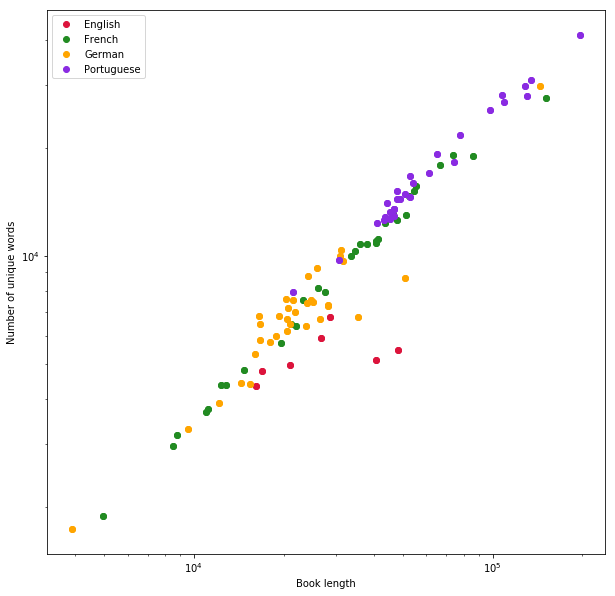

In [42]:
plt.figure(figsize = (10,10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")
subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "forestgreen")
subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")
subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label = "Portuguese", color = "blueviolet")

plt.legend()
plt.xlabel("Book length")
plt.ylabel("Number of unique words")
plt.savefig("LanguagePlot.png")